### Análise exploratória dos dados

#### Bibliotecas e arquivos

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

In [22]:
file_bts = "Bts.csv"
file_meds_train = "meds_train_alunos.csv"
file_submit = "submit_alunos.csv"
file_meds_test = "meds_test_alunos.csv"

In [23]:
df_bts = pd.read_csv(file_bts)
df_meds_train = pd.read_csv(file_meds_train)
df_submit = pd.read_csv(file_submit)
df_meds_test = pd.read_csv(file_meds_test)

In [24]:
datasets = {
    "df_meds_train": df_meds_train,
    "df_meds_test": df_meds_test
}

#### Análises iniciais

In [25]:
for name, dataset in datasets.items():
    print(name)
    print(dataset.dtypes)  # Exibe os tipos das colunas
    print("\n")

df_meds_train
ponto_id      int64
rssi_1_1    float64
rssi_1_2    float64
rssi_1_3    float64
rssi_2_1    float64
rssi_2_2    float64
rssi_2_3    float64
rssi_3_1    float64
rssi_3_2    float64
rssi_3_3    float64
delay_1     float64
delay_2     float64
delay_3     float64
lat         float64
lon         float64
indoor         bool
dtype: object


df_meds_test
ponto_id      int64
rssi_1_1    float64
rssi_1_2    float64
rssi_1_3    float64
rssi_2_1    float64
rssi_2_2    float64
rssi_2_3    float64
rssi_3_1    float64
rssi_3_2    float64
rssi_3_3    float64
delay_1     float64
delay_2     float64
delay_3     float64
dtype: object




In [26]:
for name, dataset in datasets.items():
    print(name)
    print(dataset.shape) # Exibe o tamanho do dataset
    print(dataset.head())  # Exibe as primeiras linhas do dataset
    print("\n")

df_meds_train
(6775, 16)
   ponto_id    rssi_1_1    rssi_1_2    rssi_1_3    rssi_2_1    rssi_2_2  \
0      6604 -103.705000 -110.425000 -107.381667 -110.330000 -108.345000   
1      5515 -105.225000 -115.000000 -105.210000 -115.000000 -105.835000   
2      5049 -102.610000 -115.000000 -101.380000 -115.000000 -104.295000   
3      8737  -89.140000  -97.251429  -86.642857  -96.036667  -96.592500   
4      1203 -109.088333 -107.200000 -107.010000 -108.430000 -104.845714   

     rssi_2_3    rssi_3_1    rssi_3_2  rssi_3_3  delay_1  delay_2  delay_3  \
0 -106.590000 -107.153333 -102.120000   -115.00      5.0      3.0      2.0   
1 -115.000000  -88.470000  -94.024286   -108.12      5.0      3.0      2.0   
2  -97.360000  -96.980000  -99.572500   -115.00      5.0      3.0      2.0   
3  -92.460000  -86.813333 -102.688000    -87.27      4.0      7.0      2.0   
4 -101.435714 -103.065000 -102.110000   -115.00      5.0      3.0      2.0   

        lat        lon  indoor  
0 -8.055786 -34.951505

In [27]:
for name, dataset in datasets.items():
    print(name)
    print(dataset.isnull().sum())  # Exibe se existe valor nulo no dataset
    print("\n")

df_meds_train
ponto_id    0
rssi_1_1    0
rssi_1_2    0
rssi_1_3    0
rssi_2_1    0
rssi_2_2    0
rssi_2_3    0
rssi_3_1    0
rssi_3_2    0
rssi_3_3    0
delay_1     0
delay_2     0
delay_3     0
lat         0
lon         0
indoor      0
dtype: int64


df_meds_test
ponto_id    0
rssi_1_1    0
rssi_1_2    0
rssi_1_3    0
rssi_2_1    0
rssi_2_2    0
rssi_2_3    0
rssi_3_1    0
rssi_3_2    0
rssi_3_3    0
delay_1     0
delay_2     0
delay_3     0
dtype: int64




#### Estatísticas descritivas

In [28]:
# Análise de estatísticas descritivas
for name, df in datasets.items():
    print(f"Estatísticas de {name}:")
    print(df.describe(), "\n")

Estatísticas de df_meds_train:
          ponto_id     rssi_1_1     rssi_1_2     rssi_1_3     rssi_2_1  \
count  6775.000000  6775.000000  6775.000000  6775.000000  6775.000000   
mean   4856.099779  -100.789923  -105.688802  -100.545198  -103.524786   
std    2785.645694    10.025728    10.397924     9.968138    13.367328   
min       1.000000  -115.000000  -115.000000  -115.000000  -115.000000   
25%    2434.500000  -107.650000  -115.000000  -107.148571  -115.000000   
50%    4875.000000  -103.040000  -110.425000   -99.750000  -108.430000   
75%    7272.500000   -93.455000   -97.350000   -93.340000   -96.817917   
max    9676.000000   -61.380000   -64.820000   -60.640000   -36.960000   

          rssi_2_2     rssi_2_3     rssi_3_1     rssi_3_2     rssi_3_3  \
count  6775.000000  6775.000000  6775.000000  6775.000000  6775.000000   
mean    -97.210290   -97.193499   -93.644749   -93.353728  -107.478361   
std       8.853480     9.992950     7.688089     8.110877    11.003407   
min   

In [29]:
for name, dataset in datasets.items():
    print(f"\nEstatísticas do dataset: {name}\n")

    # Criar um dicionário para armazenar as estatísticas de cada coluna
    stats = {}

    for column in dataset.select_dtypes(include=[np.number]).columns:
        col_data = dataset[column].dropna()
        stats[column] = {
            "Média": col_data.mean(),
            "Mediana": col_data.median(),
            "Moda": mode(col_data, keepdims=True).mode[0] if not col_data.empty else None,
            "Desvio Padrão": col_data.std(),
            "Mínimo": col_data.min(),
            "Máximo": col_data.max(),
            "1º Quartil (Q1)": col_data.quantile(0.25),
            "2º Quartil (Mediana)": col_data.quantile(0.50),
            "3º Quartil (Q3)": col_data.quantile(0.75),
        }

    # Criar DataFrame com as estatísticas
    stats_df = pd.DataFrame(stats)

    # Exibir tabela
    print(stats_df, "\n")



Estatísticas do dataset: df_meds_train

                         ponto_id    rssi_1_1    rssi_1_2    rssi_1_3  \
Média                 4856.099779 -100.789923 -105.688802 -100.545198   
Mediana               4875.000000 -103.040000 -110.425000  -99.750000   
Moda                     1.000000 -115.000000 -115.000000 -115.000000   
Desvio Padrão         2785.645694   10.025728   10.397924    9.968138   
Mínimo                   1.000000 -115.000000 -115.000000 -115.000000   
Máximo                9676.000000  -61.380000  -64.820000  -60.640000   
1º Quartil (Q1)       2434.500000 -107.650000 -115.000000 -107.148571   
2º Quartil (Mediana)  4875.000000 -103.040000 -110.425000  -99.750000   
3º Quartil (Q3)       7272.500000  -93.455000  -97.350000  -93.340000   

                        rssi_2_1    rssi_2_2    rssi_2_3    rssi_3_1  \
Média                -103.524786  -97.210290  -97.193499  -93.644749   
Mediana              -108.430000  -97.170000  -95.615714  -94.785000   
Moda        

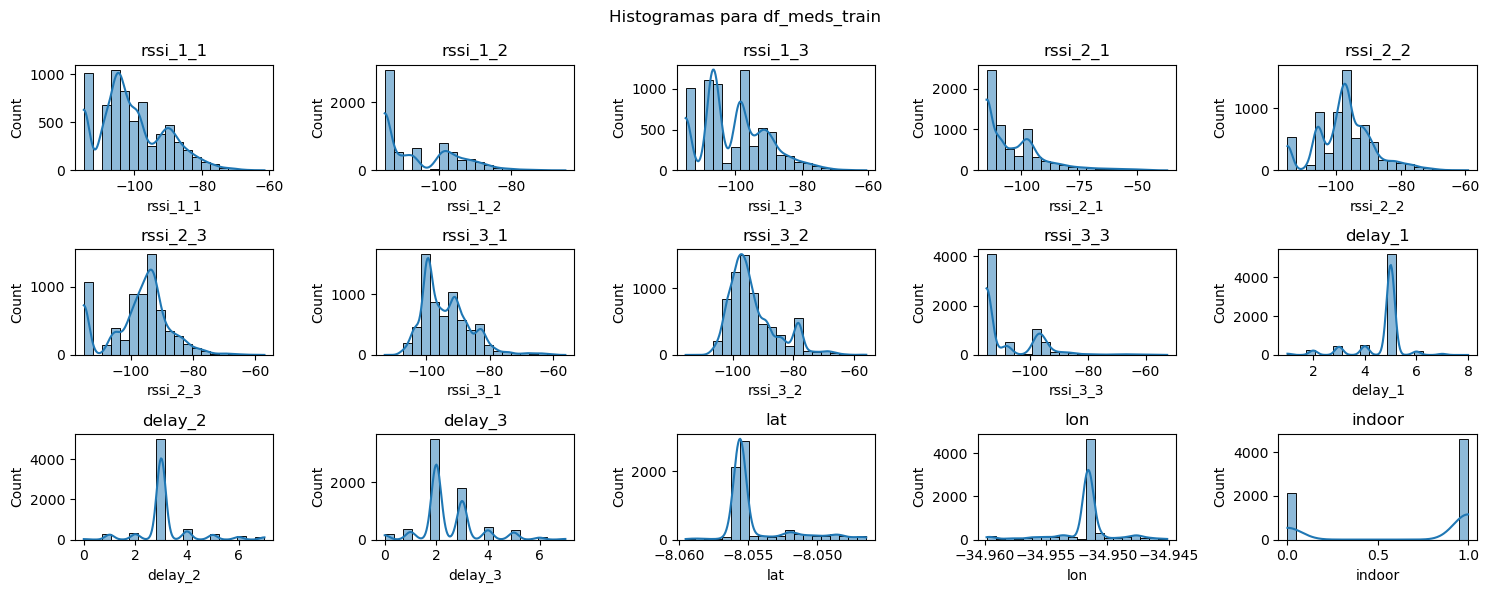

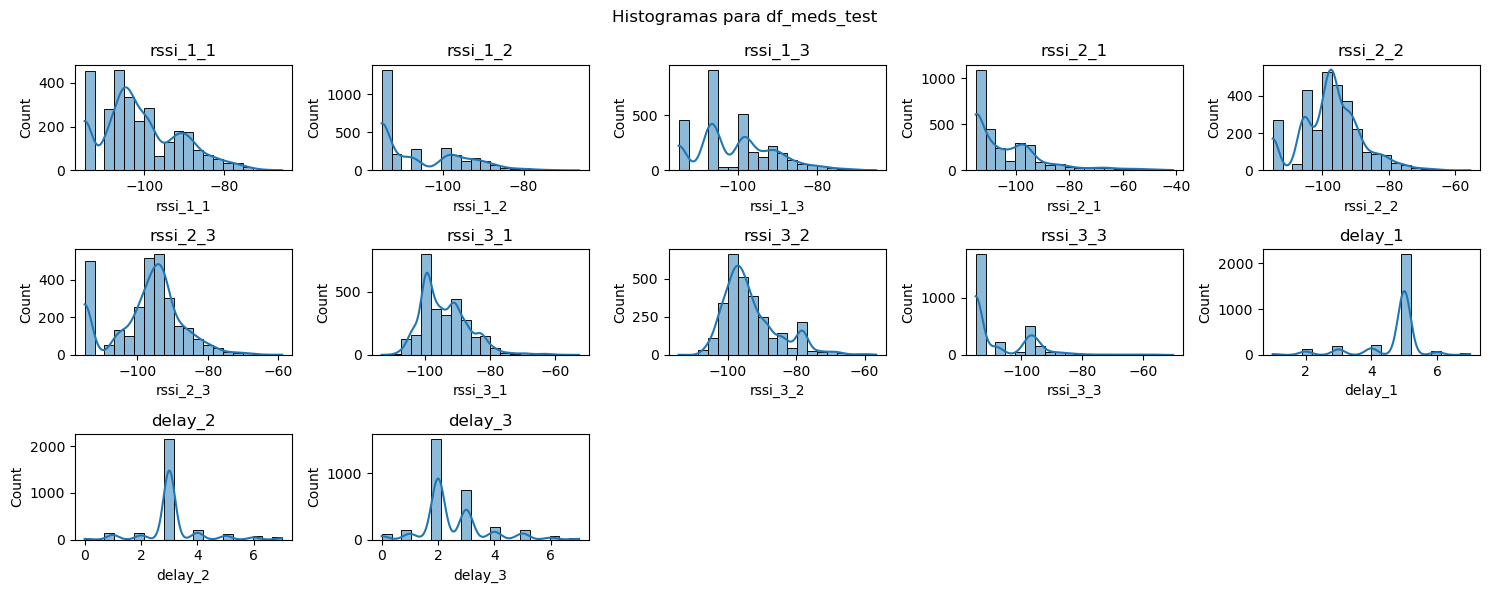

In [30]:
for name, df in datasets.items():
    plt.figure(figsize=(15, 6))
    for i, column in enumerate(df.columns[1:], 1):  # Ignorar a primeira coluna 'ponto_id'
        plt.subplot(3, 5, i)
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(column)
    plt.suptitle(f"Histogramas para {name}")
    plt.tight_layout()
    plt.show()

#### outliers

In [31]:
datasets_com_outliers = {"df_meds_train": df_meds_train, "df_meds_test": df_meds_test}

Outliers para df_meds_train - rssi_1_1: Limite Inferior: -128.94250000000002, Limite Superior: -72.1625
Outliers para df_meds_train - rssi_1_2: Limite Inferior: -141.47500000000002, Limite Superior: -70.87499999999999
Outliers para df_meds_train - rssi_1_3: Limite Inferior: -127.8614285714275, Limite Superior: -72.6271428571435
Outliers para df_meds_train - rssi_2_1: Limite Inferior: -142.273125, Limite Superior: -69.54479166666665
Outliers para df_meds_train - rssi_2_2: Limite Inferior: -117.38714285714249, Limite Superior: -76.89571428571449
Outliers para df_meds_train - rssi_2_3: Limite Inferior: -116.20499999999964, Limite Superior: -77.39928571428595
Outliers para df_meds_train - rssi_3_1: Limite Inferior: -114.63750000000002, Limite Superior: -74.2175
Outliers para df_meds_train - rssi_3_2: Limite Inferior: -113.09674999999999, Limite Superior: -75.51875000000001
Outliers para df_meds_train - rssi_3_3: Limite Inferior: -141.10000000000002, Limite Superior: -71.49999999999999
Outl

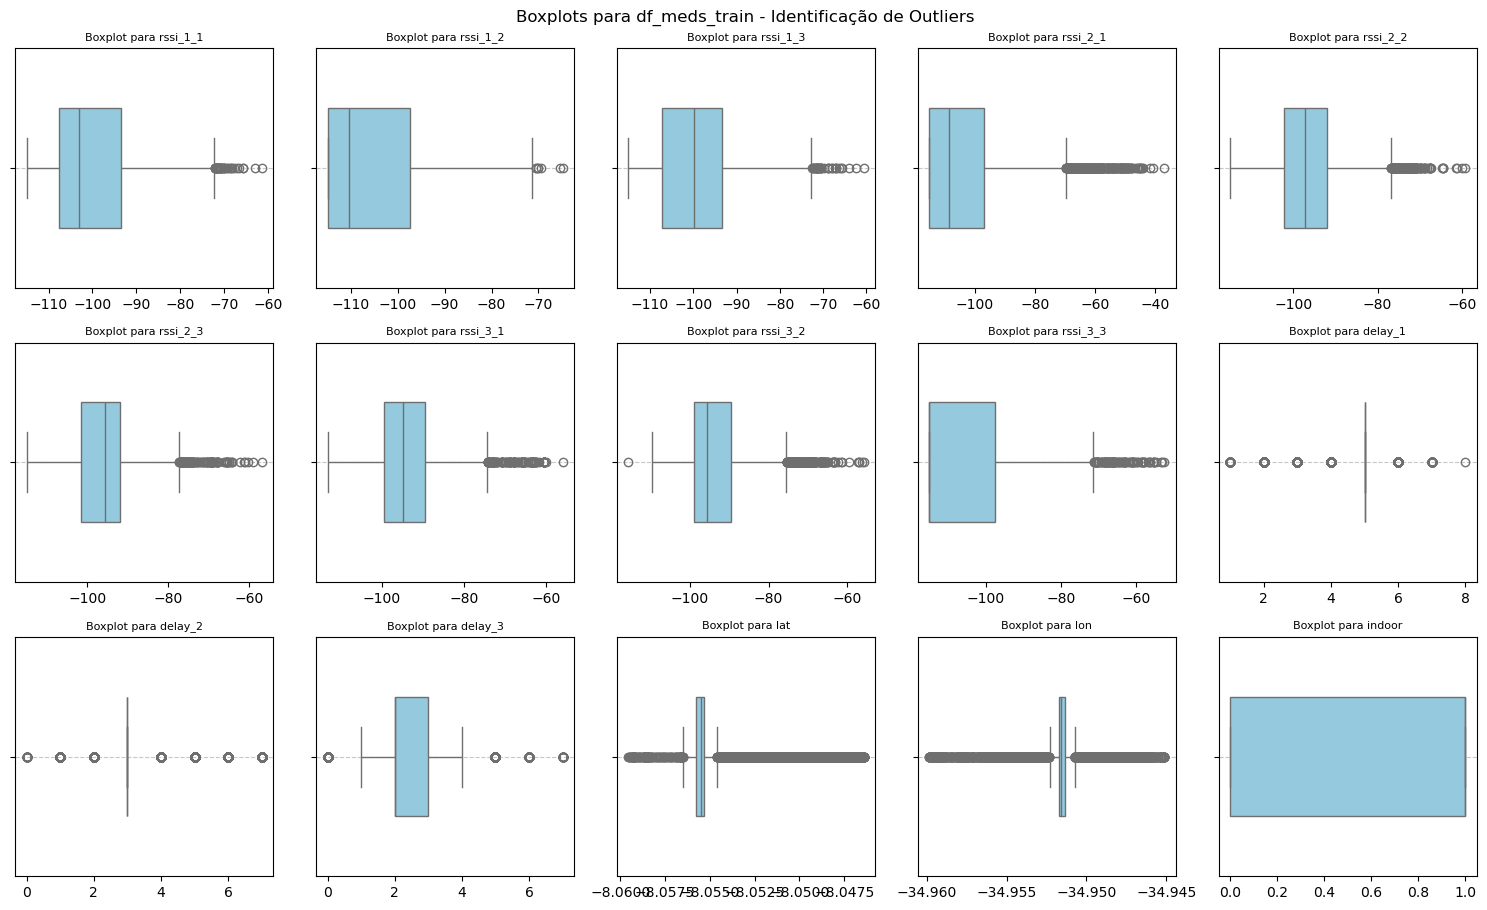

Outliers para df_meds_test - rssi_1_1: Limite Inferior: -128.6119642857143, Limite Superior: -72.71339285714288
Outliers para df_meds_test - rssi_1_2: Limite Inferior: -141.47500000000002, Limite Superior: -70.87499999999999
Outliers para df_meds_test - rssi_1_3: Limite Inferior: -127.48214285714175, Limite Superior: -73.25928571428642
Outliers para df_meds_test - rssi_2_1: Limite Inferior: -142.675, Limite Superior: -68.875
Outliers para df_meds_test - rssi_2_2: Limite Inferior: -120.38499999999999, Limite Superior: -74.86500000000001
Outliers para df_meds_test - rssi_2_3: Limite Inferior: -117.57848214285715, Limite Superior: -77.2091964285714
Outliers para df_meds_test - rssi_3_1: Limite Inferior: -113.78312499999998, Limite Superior: -75.37479166666668
Outliers para df_meds_test - rssi_3_2: Limite Inferior: -113.26946428571435, Limite Superior: -74.65089285714274
Outliers para df_meds_test - rssi_3_3: Limite Inferior: -141.10000000000002, Limite Superior: -71.49999999999999
Outlier

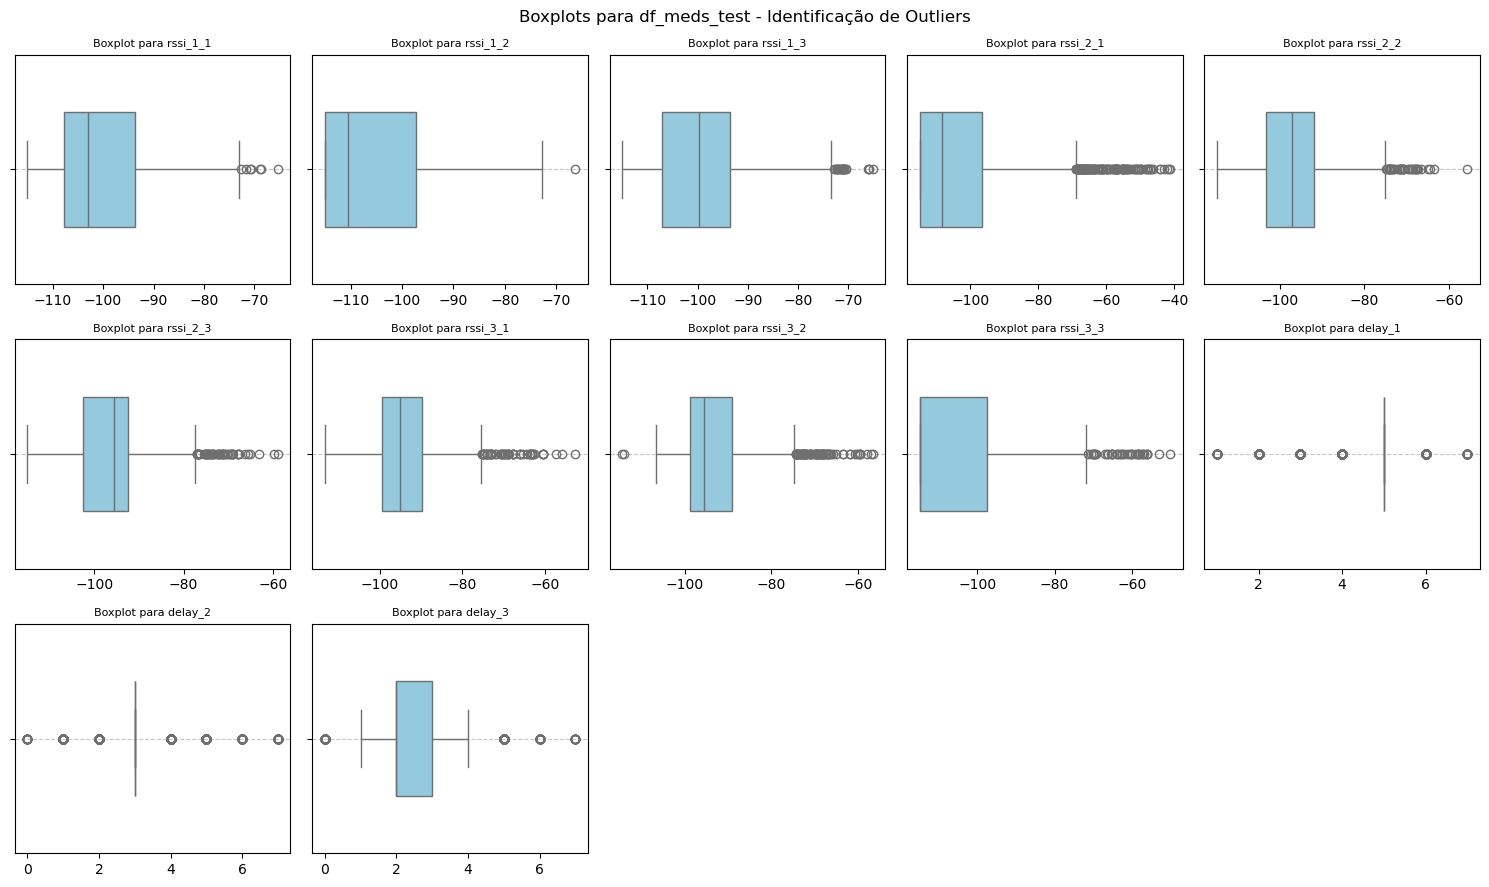

In [32]:
for name, df in datasets_com_outliers.items():
    # Ajuste o número de colunas para os gráficos lado a lado
    n_columns = 5  # Quantidade de colunas (ajuste conforme necessário)
    n_rows = (len(df.columns) - 1) // n_columns + 1  # Calcula quantas linhas são necessárias

    # Criar figura com tamanho ajustado para múltiplos gráficos
    plt.figure(figsize=(n_columns * 3, n_rows * 3))  # Ajuste o tamanho global dos gráficos

    # Para cada coluna do dataset (exceto a primeira coluna, que é o índice)
    for i, column in enumerate(df.columns[1:], 1):  # Ignora a primeira coluna 'ponto_id'
        # Verifica se a coluna é numérica ou booleana
        if pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_bool_dtype(df[column]):
            # Se for booleana, converte para 1 (True) e 0 (False)
            if pd.api.types.is_bool_dtype(df[column]):
                df[column] = df[column].astype(int)

            plt.subplot(n_rows, n_columns, i)  # Organiza os subgráficos

            # Calcular Q1, Q3 e IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir limites para outliers
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Exibir os limites para verificar
            print(f"Outliers para {name} - {column}: Limite Inferior: {limite_inferior}, Limite Superior: {limite_superior}")

            # Plotando o boxplot
            sns.boxplot(x=df[column], color="skyblue", width=0.5)

            # Adicionar título e rótulos com fontes menores
            plt.title(f'Boxplot para {column}', fontsize=8)
            plt.xlabel('', fontsize=6)  # Remove o rótulo do eixo X
            plt.ylabel('', fontsize=6)  # Remove o rótulo do eixo Y
            plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona grid no eixo Y
        else:
            print(f"Coluna {column} em {name} não é numérica nem booleana e foi ignorada.")

    # Adicionar título geral para o dataset
    plt.suptitle(f"Boxplots para {name} - Identificação de Outliers", fontsize=12)
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()

In [33]:
outliers_report = {}

for name, df in datasets_com_outliers.items():
    if name == 'mds train':
        df = df.drop(columns=['indoor'])  # Remove a coluna 'indoor' para o dataset 'mds train'

    df = df.drop(index=0)  # Ignora a primeira linha do dataset

    outliers_report[name] = {}
    numeric_columns = df.select_dtypes(include=[np.number]).columns  # Seleciona apenas colunas numéricas
    for column in numeric_columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1

      # Definir os limites inferior e superior para outliers
      limite_inferior = Q1 - 1.5 * IQR
      limite_superior = Q3 + 1.5 * IQR

      # Detectar os outliers
      outliers = df[(df[column] < limite_inferior) | (df[column] > limite_superior)]

      if not outliers.empty:
          outliers_report[name][column] = len(outliers)  # Armazena a quantidade de outliers por coluna

# Exibir os resultados
for dataset, columns in outliers_report.items():
    print(f"\nOutliers detectados no dataset {dataset}:")
    if columns:
        for col, count in columns.items():
            print(f"- {col}: {count} outliers detectados")
    else:
        print("Nenhum outlier detectado.")


Outliers detectados no dataset df_meds_train:
- rssi_1_1: 37 outliers detectados
- rssi_1_2: 7 outliers detectados
- rssi_1_3: 35 outliers detectados
- rssi_2_1: 218 outliers detectados
- rssi_2_2: 164 outliers detectados
- rssi_2_3: 131 outliers detectados
- rssi_3_1: 142 outliers detectados
- rssi_3_2: 194 outliers detectados
- rssi_3_3: 105 outliers detectados
- delay_1: 1573 outliers detectados
- delay_2: 1751 outliers detectados
- delay_3: 651 outliers detectados
- lat: 1676 outliers detectados
- lon: 2019 outliers detectados

Outliers detectados no dataset df_meds_test:
- rssi_1_1: 7 outliers detectados
- rssi_1_2: 1 outliers detectados
- rssi_1_3: 22 outliers detectados
- rssi_2_1: 124 outliers detectados
- rssi_2_2: 40 outliers detectados
- rssi_2_3: 55 outliers detectados
- rssi_3_1: 59 outliers detectados
- rssi_3_2: 84 outliers detectados
- rssi_3_3: 41 outliers detectados
- delay_1: 701 outliers detectados
- delay_2: 743 outliers detectados
- delay_3: 301 outliers detectad